# Volume 3: Pandas IV (Time Series).
    Ben Christensen
    Math 403
    10/29/18

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Matplotlib customizations.
# plt.style.use("ggplot")                       # Use a different style.
plt.rcParams["figure.figsize"] = [10.0, 6.0]  # Make figures larger by default.
plt.rcParams["figure.dpi"] = 200              # Raise figure quality within the notebook.

# Pandas customizations.
pd.set_option("display.max_rows", 250)        # Raise the number of rows displayed.
pd.set_option("display.max_columns", 50)      # Raise the number of columns displayed.
pd.set_option("precision", 3)                 # Truncate floats to 3 decimals in data frames.

## Problem 1
The file `DJIA.csv` contains daily closing values of the Dow Jones Industrial Average from 2006–2016.
Read the data into a `Series` or `DataFrame` with a `DatetimeIndex` as the index.
Drop rows with missing values, cast the `"VALUES"` column to floats, then plot the data.

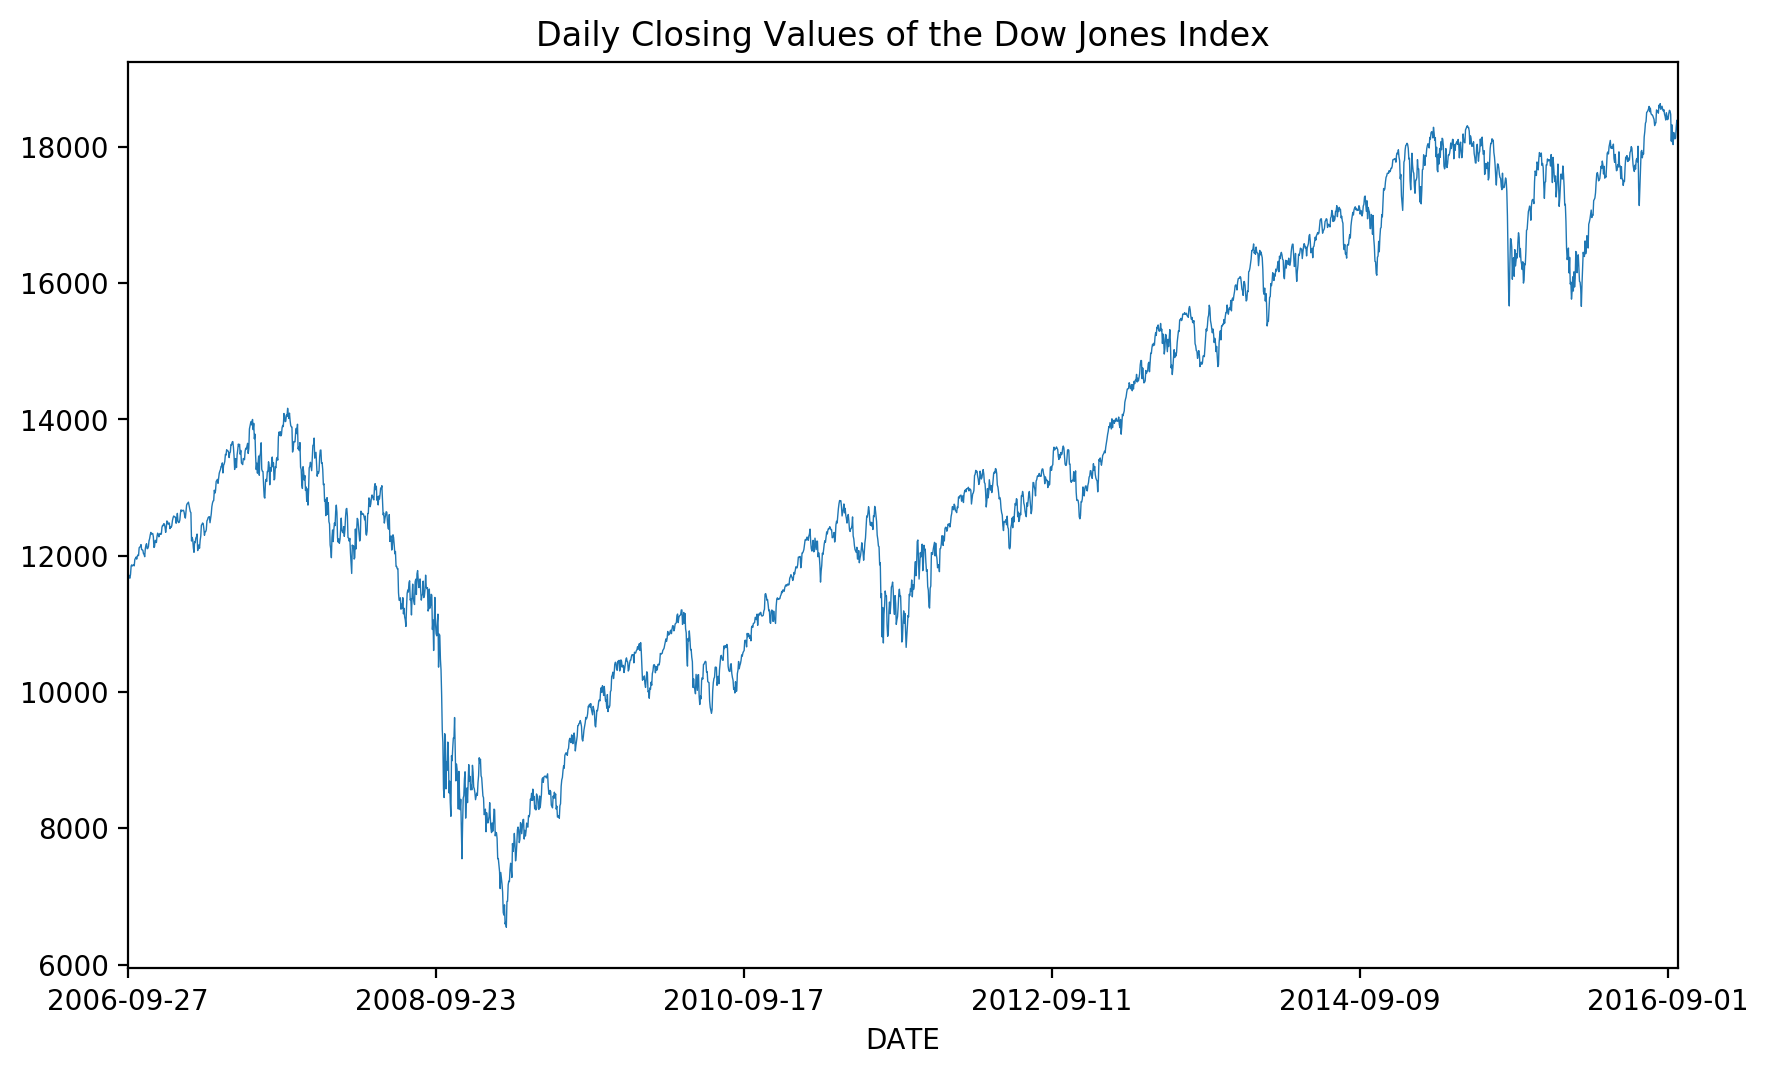

In [2]:
dow = pd.read_csv("DJIA.csv", index_col="DATE", infer_datetime_format=True).dropna()
#drop null values
dow = dow[dow['VALUE'] != '.']
#Change values to floats
dow = pd.to_numeric(dow['VALUE'])
#Plot the data
dow.plot(y='VALUE', lw=.5, title="Daily Closing Values of the Dow Jones Index")
plt.show()

## Problem 2

The file `paychecks.csv` contains values of an hourly employee's last 93 paychecks.
He started working March 13, 2008.
This company hands out paychecks on the first and third Fridays of the month.
Read in the data, using `pd.date_range()` to generate the DatetimeIndex.
Plot the data.

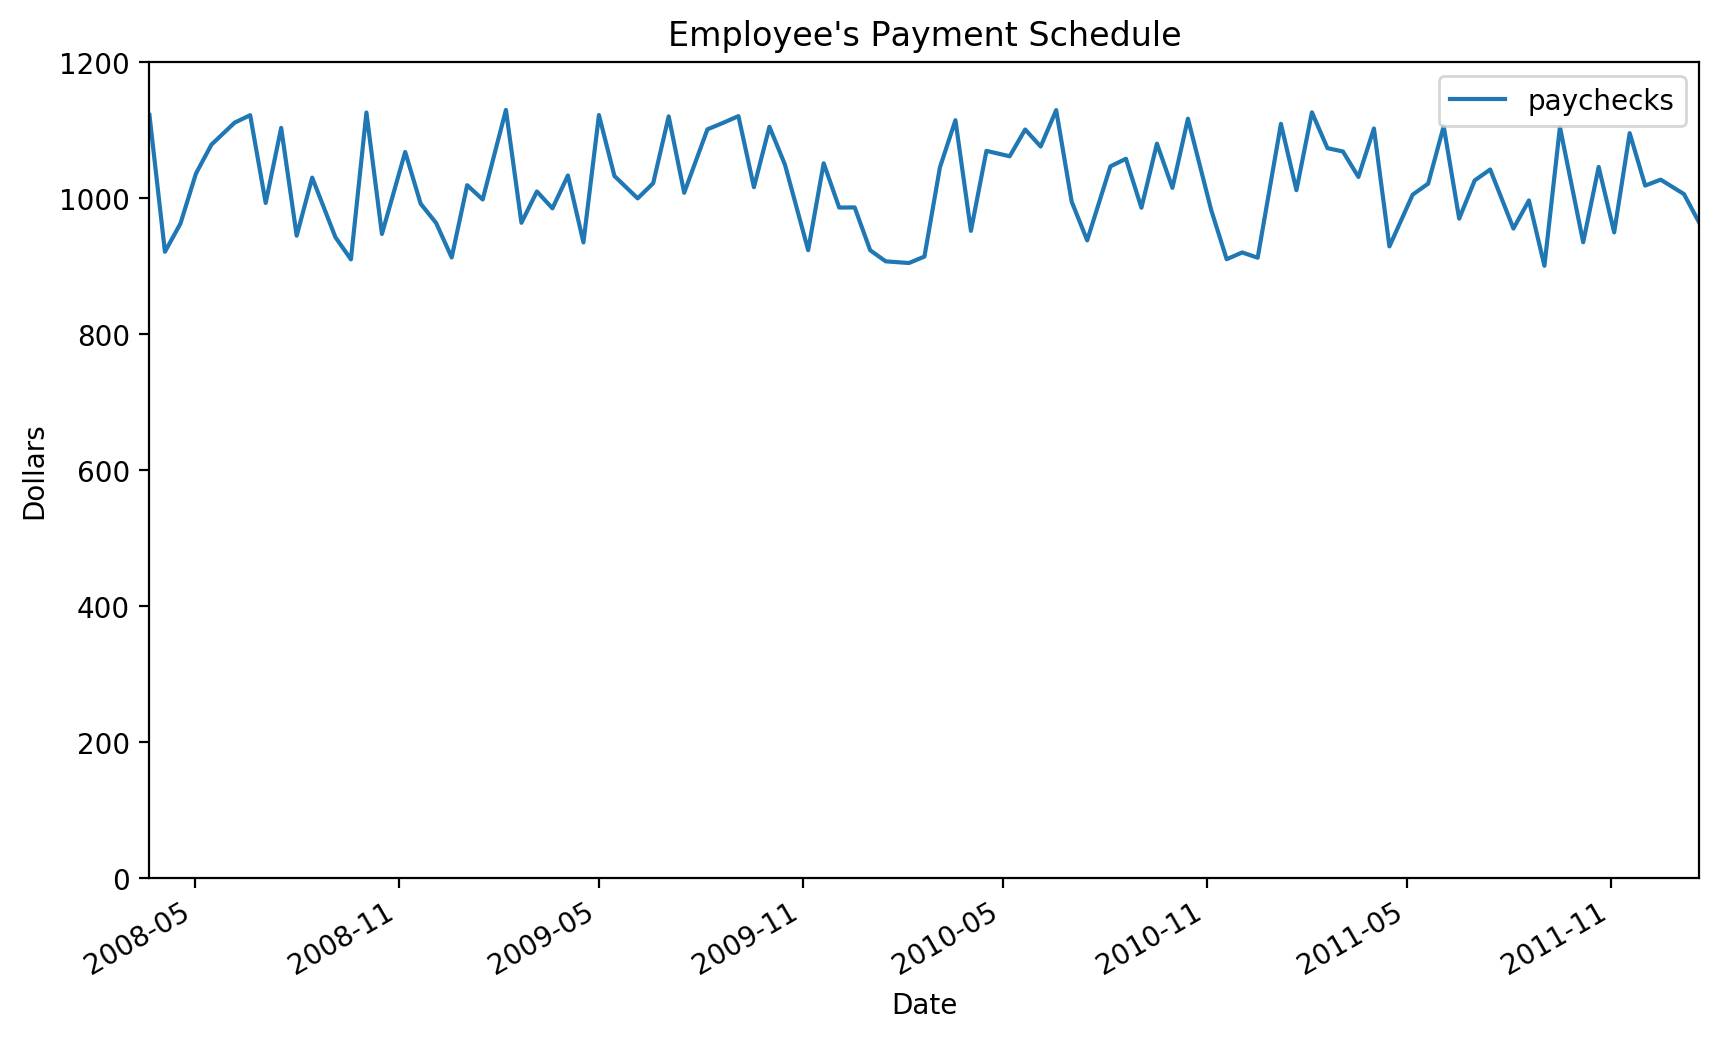

In [3]:
#Create index for every first and third friday since March 13,2008
##with 93 instances.
index1 = pd.date_range(start="3/13/2008", periods=50, freq="WOM-1FRI")
index2 = pd.date_range(start='3/13/2008', periods = 50, freq="WOM-3FRI")
index = index1.union(index2)[:93]
#Read in the data as a pandas dataframe
paychecks = pd.read_csv("paychecks.csv", header=None, names=["paychecks"])
paychecks.index = index
paychecks.index.name = "Date"
#Plot the employee's Payment Schedule
paychecks.plot(y="paychecks", title="Employee's Payment Schedule")
plt.ylabel("Dollars")
plt.ylim(0, 1200)
plt.show()

## Problem 3

The file `finances.csv` contains a list of simulated quarterly earnings and expense totals from a fictional company.
Load the data into a `Series` or `DataFrame` with a `PeriodIndex` with a quarterly frequency.
Assume the fiscal year starts at the beginning of September and that the data begins in September 1978.
Plot the data.

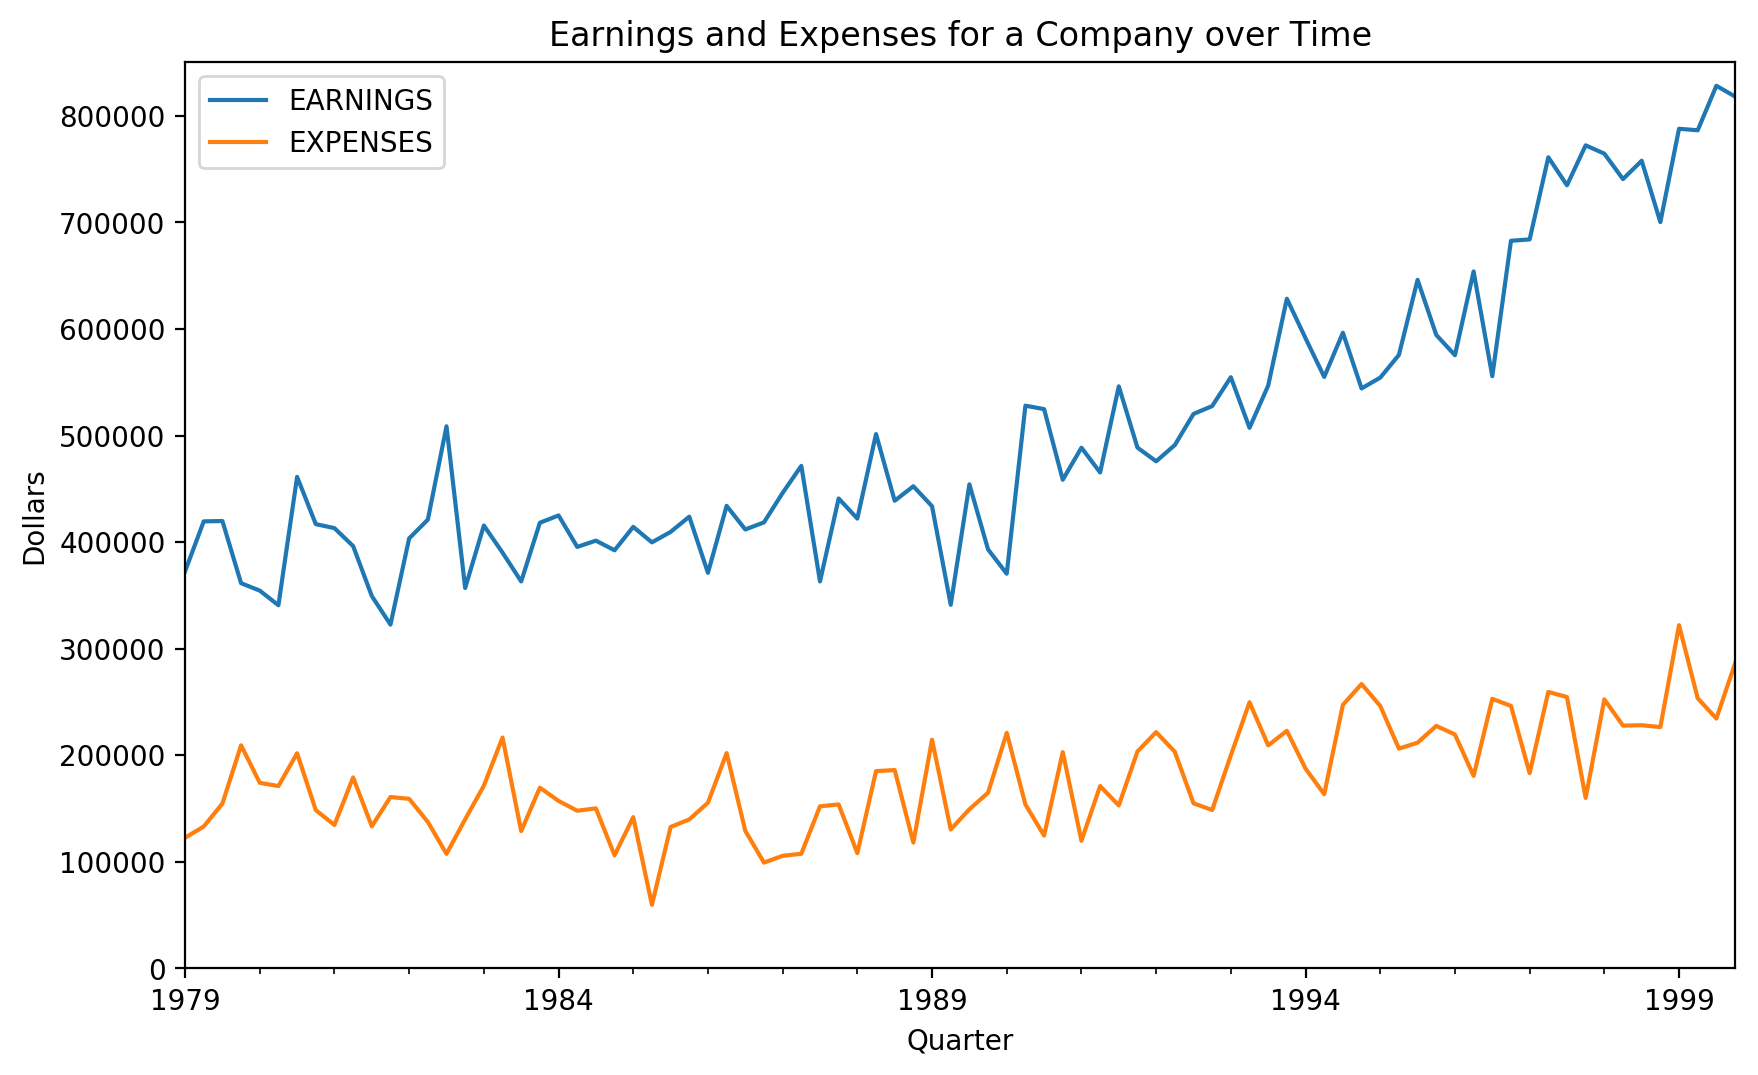

In [4]:
finances = pd.read_csv("finances.csv")
#Create a quarterly index starting at September 1978
##with September as the beginning of the fiscal year
index = pd.period_range(start="09/1978", end="09/2000", freq="Q-AUG")[:84]
finances.index = index
finances.index.name = "Quarter"
#Plot the earnings against the expenses
finances.plot(y=["EARNINGS", "EXPENSES"], title="Earnings and Expenses for a Company over Time")
plt.ylabel("Dollars")
plt.ylim(0, 850000)
plt.show()

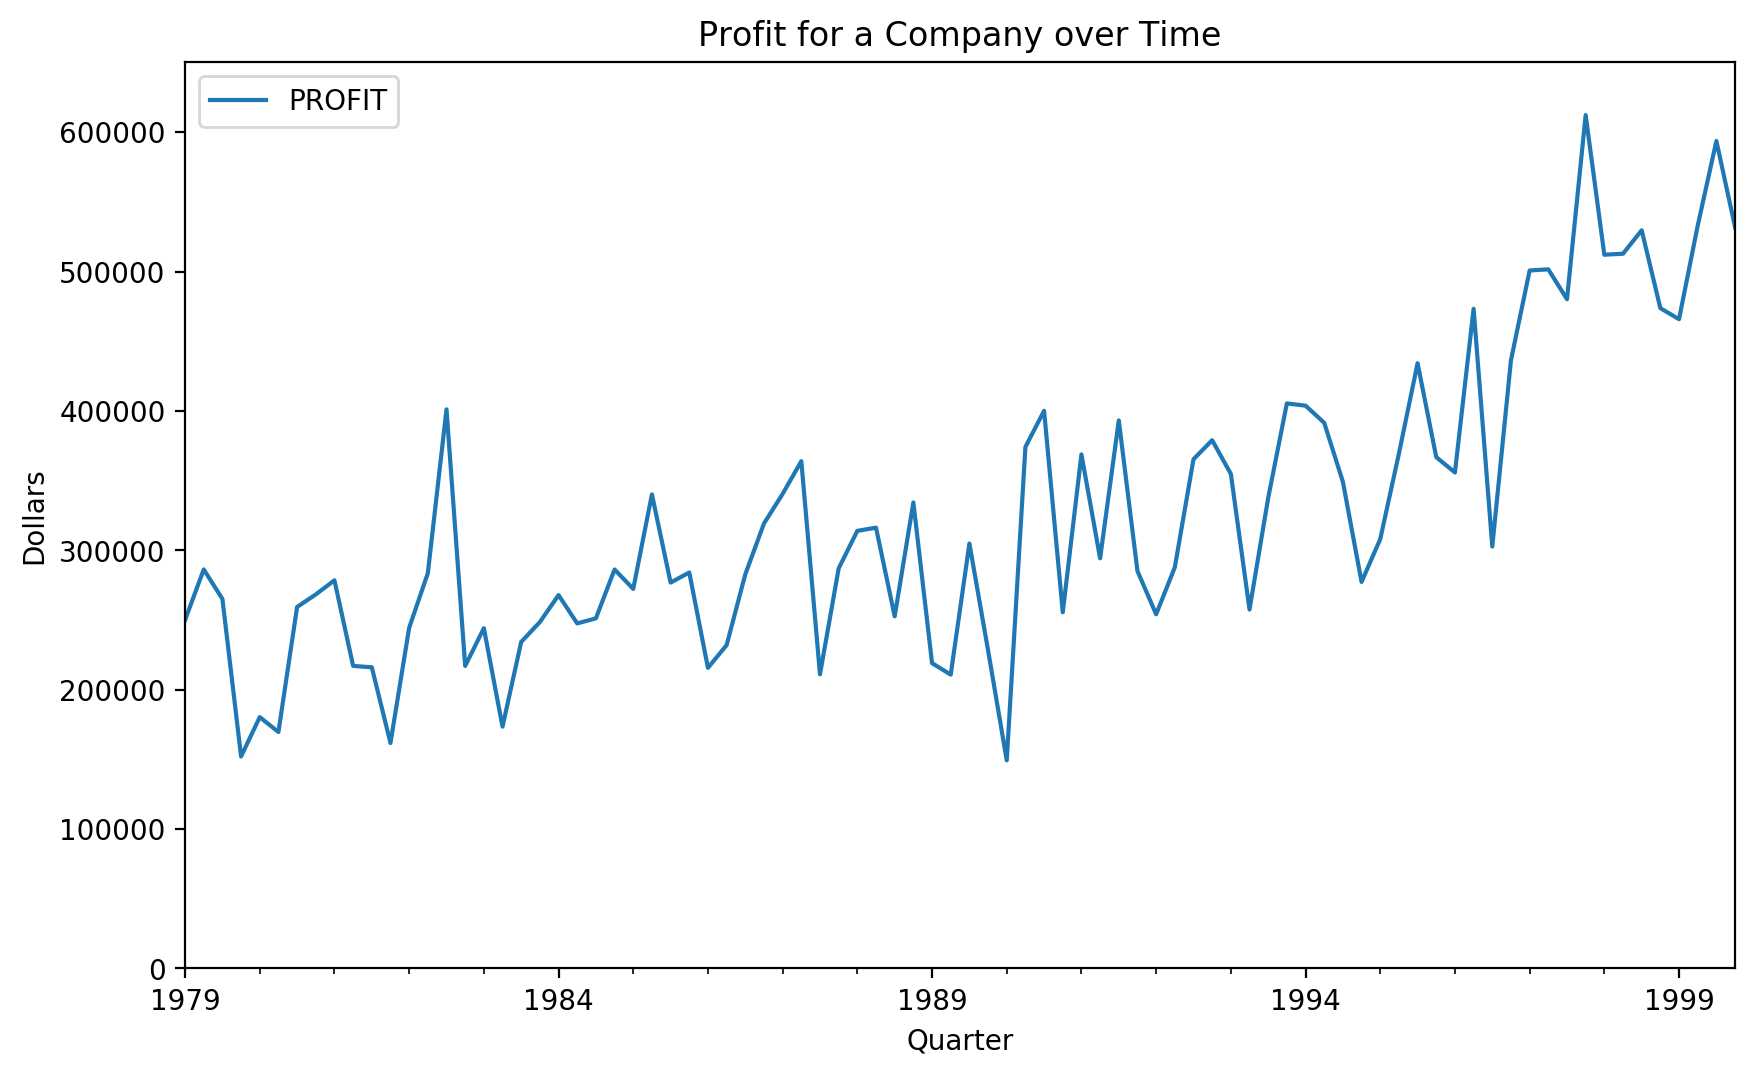

In [5]:
#Calculate the company's profit
finances['PROFIT'] = finances['EARNINGS'] - finances['EXPENSES']
#Plot the company's profit over time
finances.plot(y="PROFIT", title="Profit for a Company over Time")
plt.ylabel("Dollars")
plt.ylim(0, 650000)
plt.show()

## Problem 4

The file `website_traffic.csv` contains records for different visits to a fictitious website.
Read in the data, calculate the duration of each visit (in seconds), and convert the index to a `DatetimeIndex`.
Use downsampling to calculate the average visit duration by minute, and the average visit duration by hour.
Plot both results on the same graph.

/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2340: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  return y.index.values, y.values
/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2340: FutureWarning: 
.resample() is now a deferred operation
You called values(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  return y.index.values, y.values


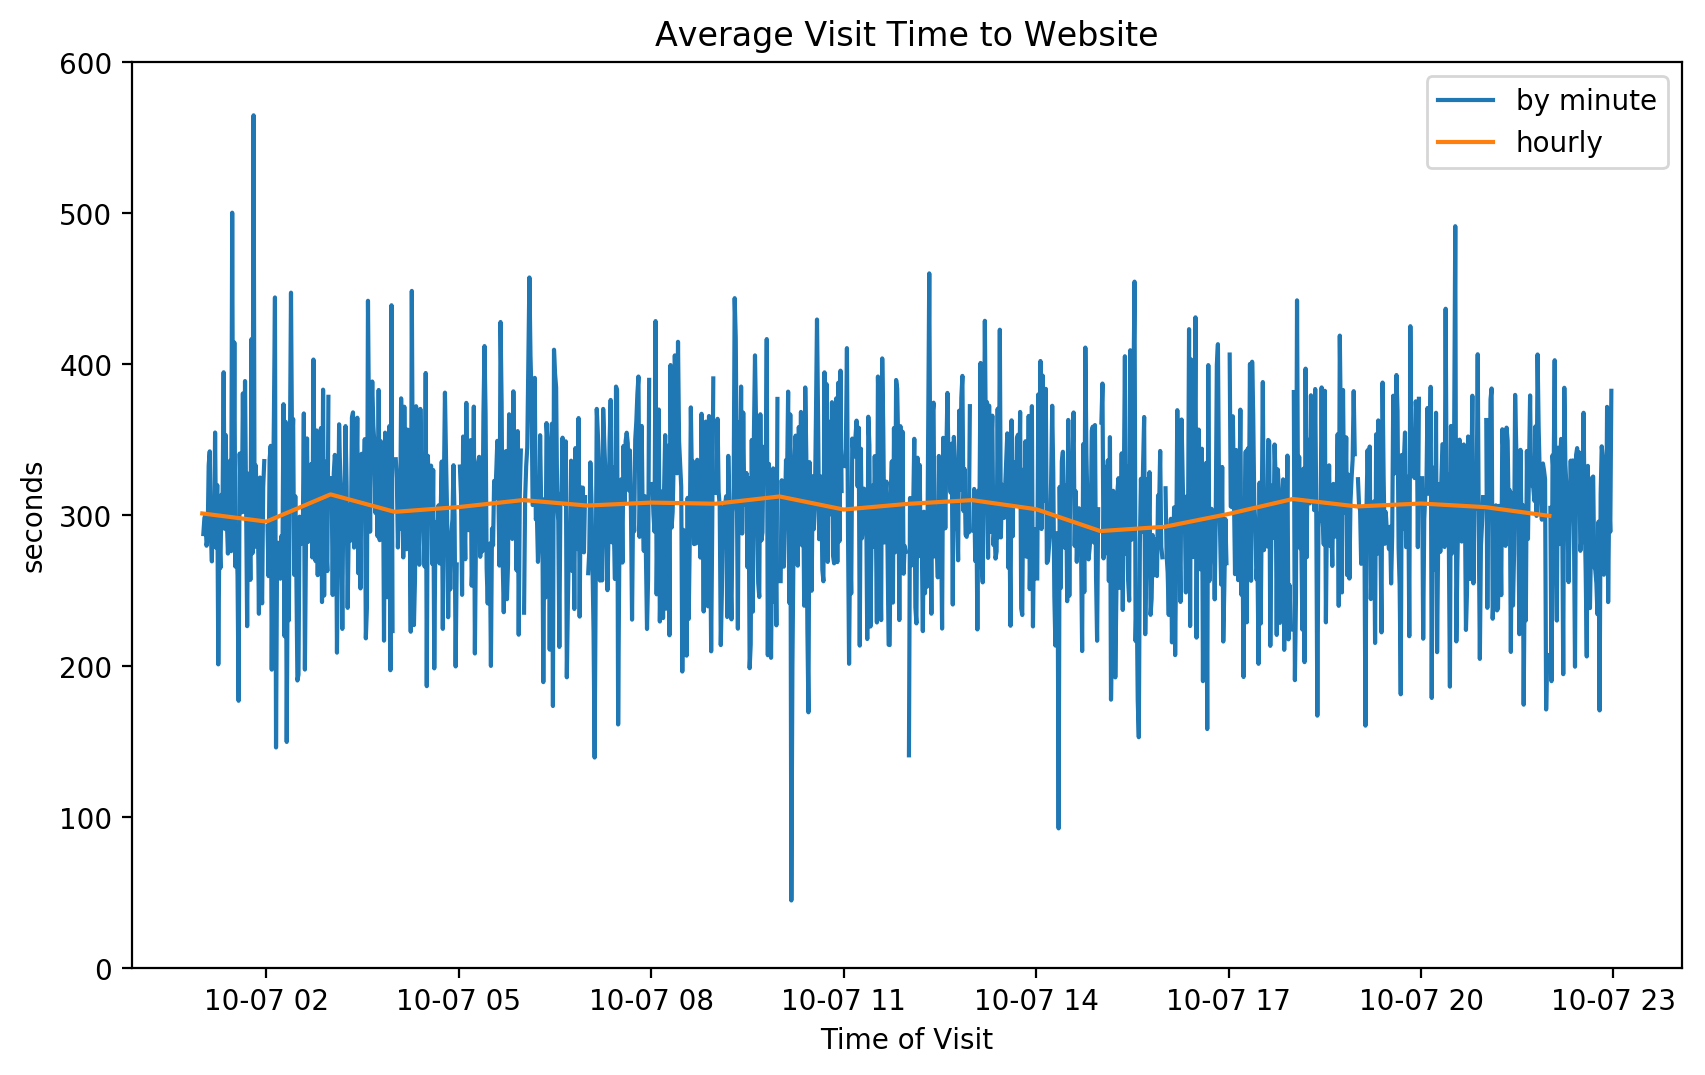

In [6]:
web_df = pd.read_csv("website_traffic.csv")
web_df['ENTER'] = pd.to_datetime(web_df['ENTER'])
web_df['LEAVE'] = pd.to_datetime(web_df['LEAVE'])
#Calculate number of seconds for each visit
web_df['DURATION'] = np.array([diff.seconds for diff in (web_df['LEAVE'] - web_df['ENTER'])])
web_df.index = web_df['ENTER']
#Resample
minutes = web_df.resample("T")
hours = web_df.resample("h")
#Plot averages
plt.plot(minutes, label="by minute")
plt.plot(hours, label="hourly")
plt.title("Average Visit Time to Website")
plt.xlabel("Time of Visit")
plt.ylabel("seconds")
plt.legend()
plt.ylim(0, 600)
plt.show()

## Problem 5
Compute the following information about the DJIA dataset from Problem 1.
- The single day with the largest gain.
- The single day with the largest loss.
- The month with the largest gain.
- The month with the largest loss.

For the monthly statistics, define the gain (or loss) to be the difference between the DJIA on the last and first days of the month.

In [7]:
#Convert index to datetime index
dow.index = pd.to_datetime(dow.index)
print("Single day with largest gain:",(dow - dow.shift(1)).argmax().date())
print("Single day with largest loss:",(dow - dow.shift(1)).argmin().date())
#Find month with largest gain and greatest loss
min_, max_ = 9999999, -9999999
for year in range(2006, 2017):
    #data starts September 2006
    if year == 2006:
        start = 9
    else:
        start = 1
    #data ends October 2016
    if year == 2016:
        end = 10
    else:
        end = 13
    for month in range(start, end):
        #Create string to index the dataframe for a month
        if month < 10:
            string = str(year) + "-0" + str(month)
        else:
            string = str(year) + "-" + str(month)
        #Find the change in the index from last day of the month
        ##and first day of the month
        diff = dow[string][-1] - dow[string][0]
        #Update min and max; track the corresponding month
        if diff < min_:
            min_ = diff
            loss_month = string
        if diff > max_:
            max_ = diff
            gain_month = string


print("Month with largest gain:",gain_month)
print("Month with largest loss:",loss_month)


Single day with largest gain: 2008-10-13
Single day with largest loss: 2008-09-29
Month with largest gain: 2015-10
Month with largest loss: 2008-10


## Problem 6

Plot the following from the DJIA dataset with a window or span of 30, 120, and 365.
- The original data points.
- Rolling average.
- Exponential average.
- Minimum rolling values.
- Maximum rolling values.

Describe how varying the length of the window changes the approximation to the data.

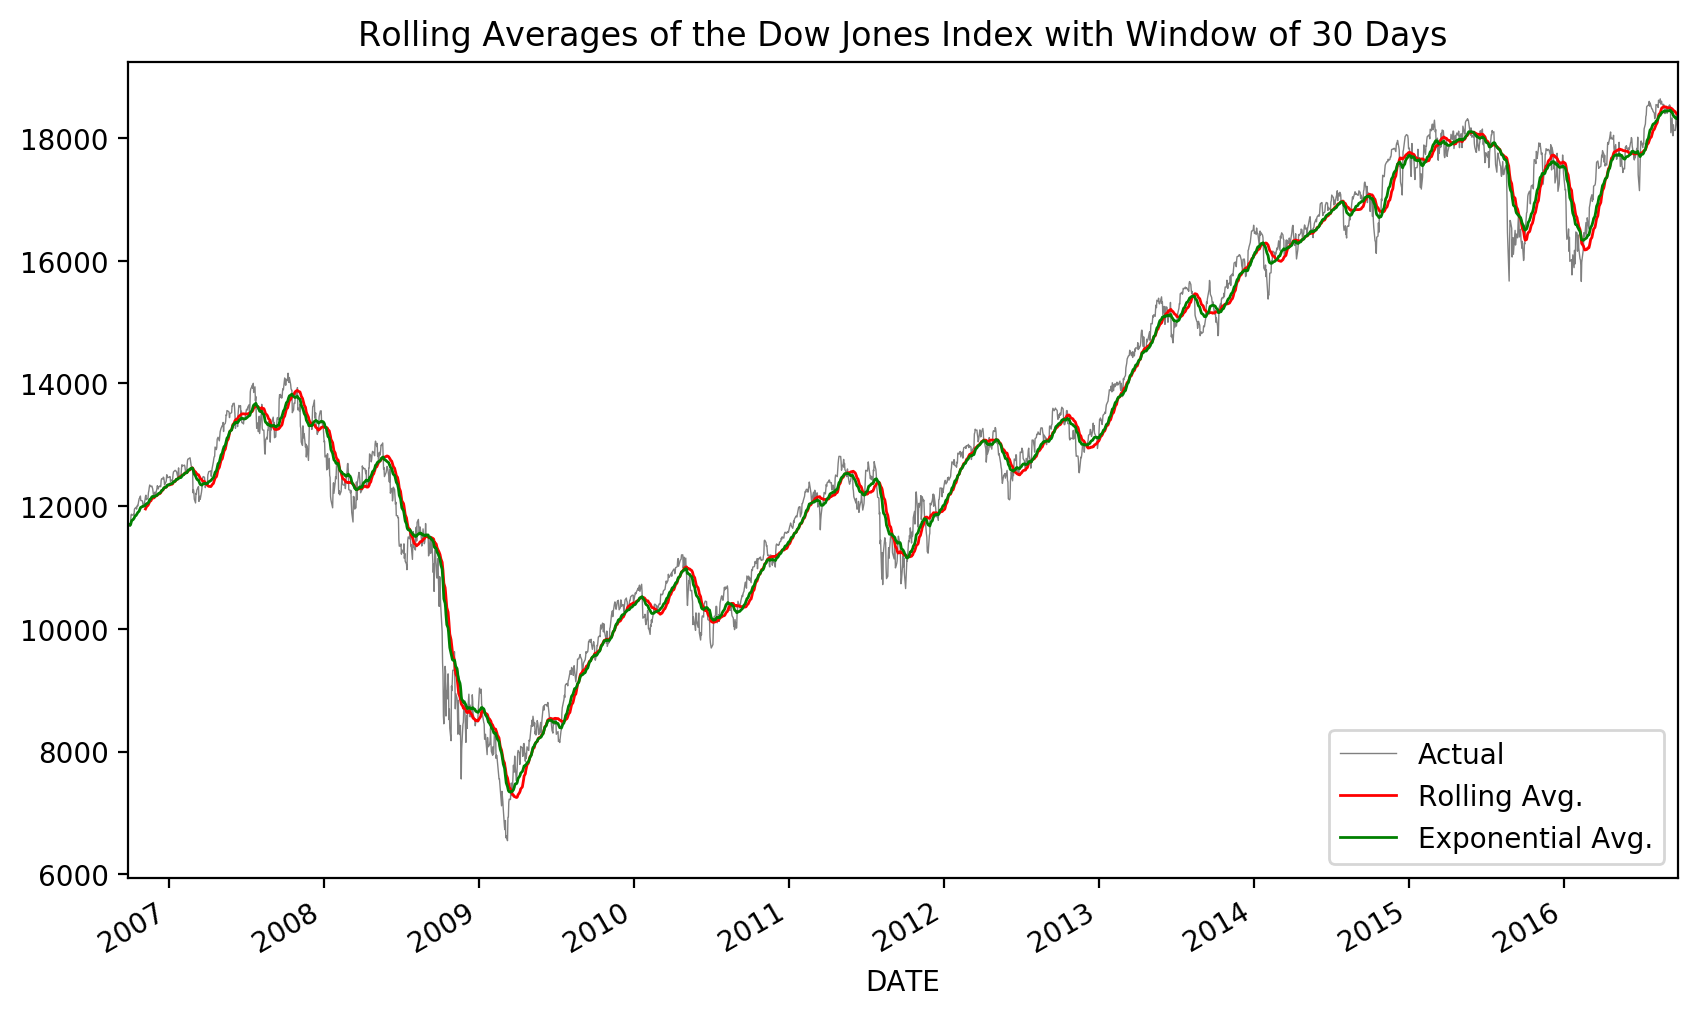

Minimum Rolling Value: 7249.76033333
Maximum Rolling Value: 18510.4343333


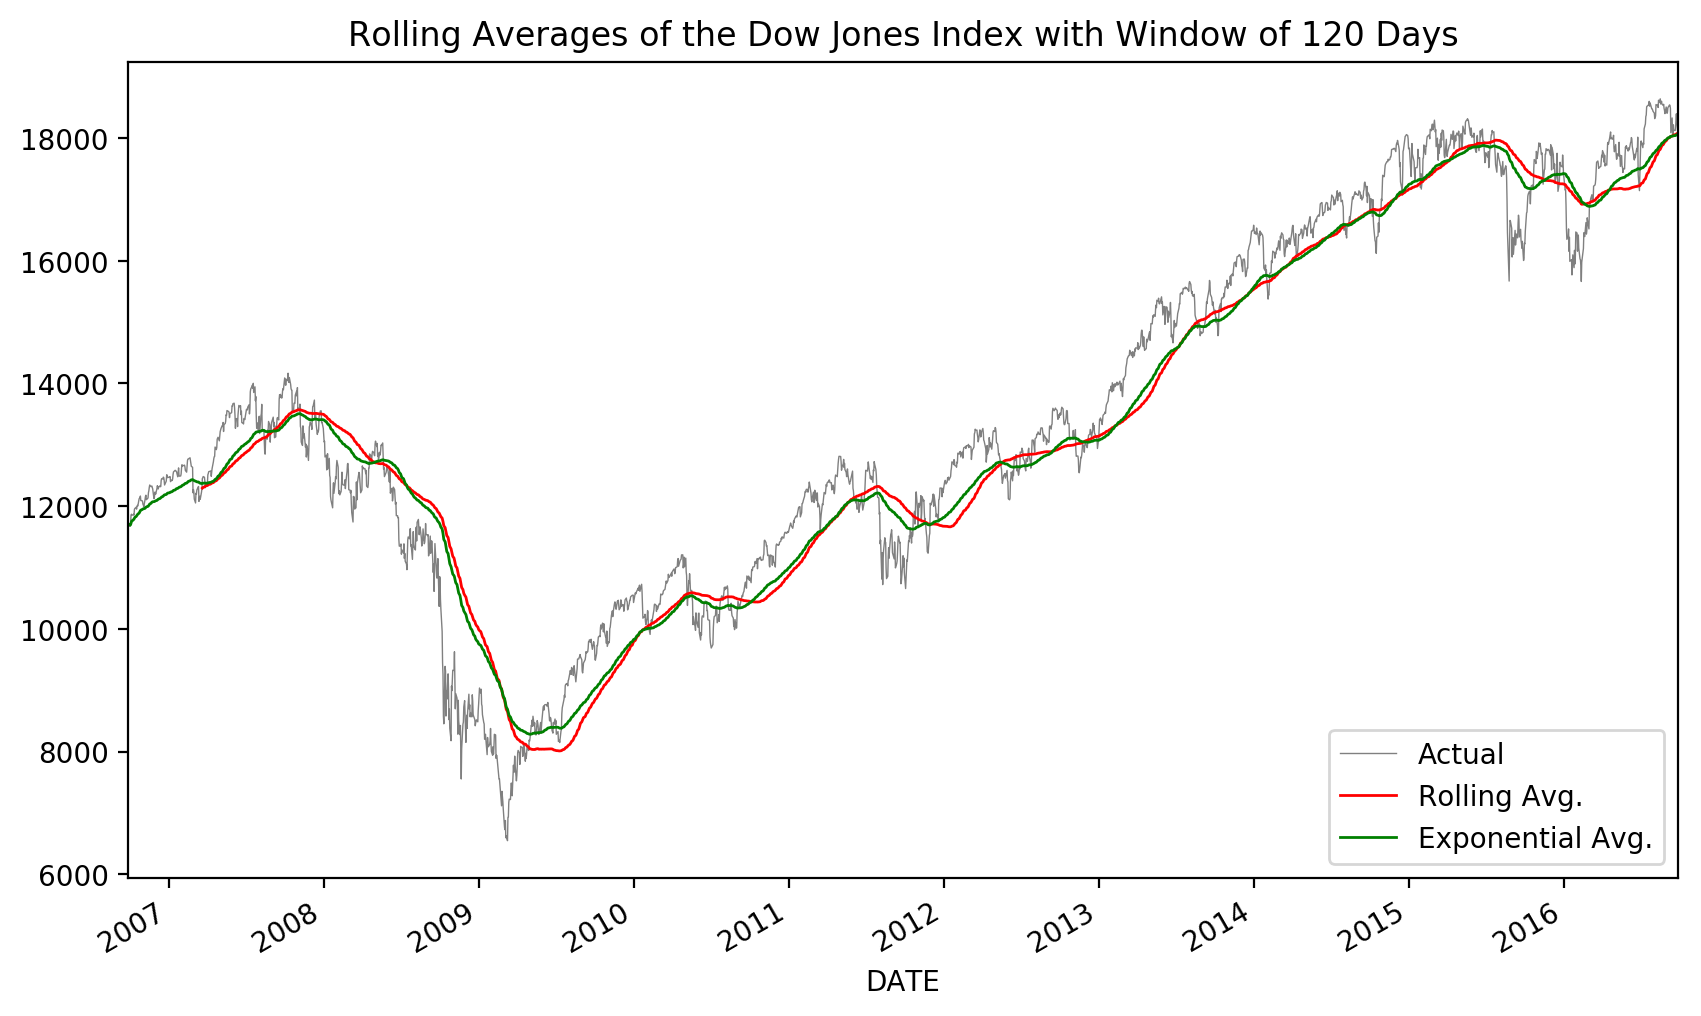

Minimum Rolling Value: 8009.35483333
Maximum Rolling Value: 18073.6470833


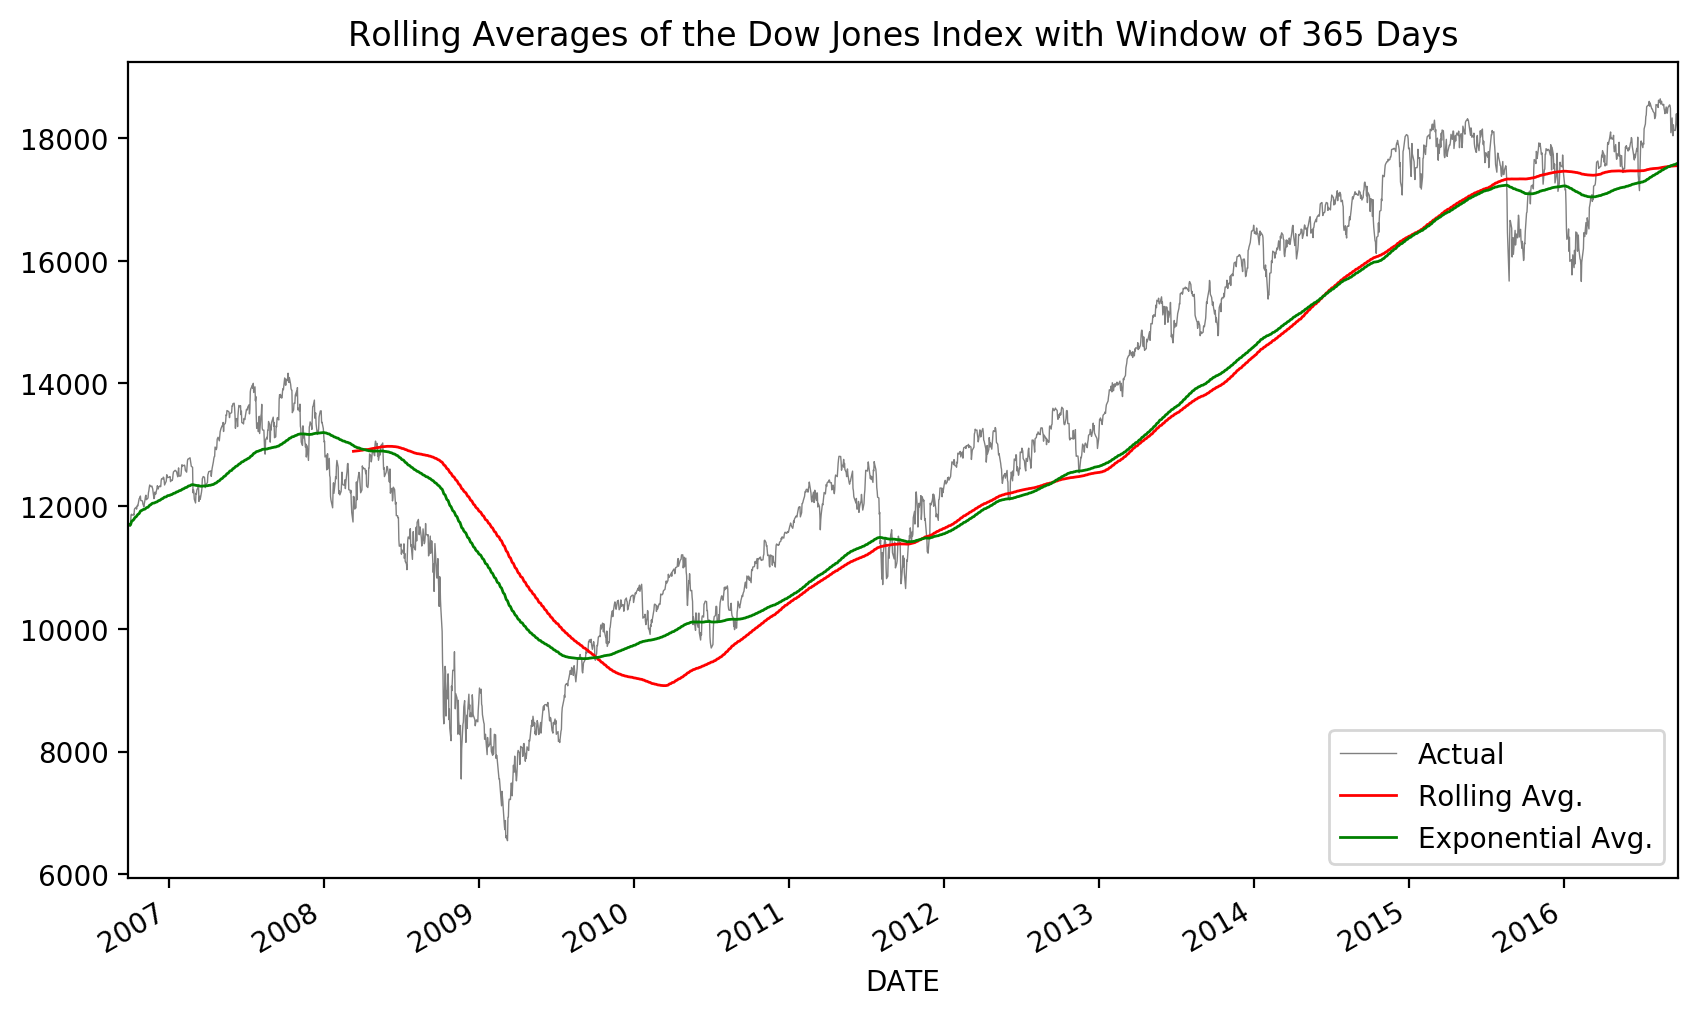

Minimum Rolling Value: 9073.12928767
Maximum Rolling Value: 17546.2984658


In [8]:
for i, span in enumerate([30, 120, 365]):
    ax = plt.subplot(111)
    title = "Rolling Averages of the Dow Jones Index with Window of " + str(span) + " Days" 
    dow.plot(color='gray',lw=.5, title=title, ax=ax)
    rolling = dow.rolling(window=span).mean()
    rolling.plot(color='r', lw=1, ax=ax)
    dow.ewm(span=span).mean().plot(color='g', lw=1, ax=ax)
    ax.legend(["Actual", "Rolling Avg.", "Exponential Avg."], loc='lower right')
    plt.show()
    print("Minimum Rolling Value:", rolling.min())
    print("Maximum Rolling Value:", rolling.max())

Increasing the window length makes the rolling average have worse fit, but the curve smooths out.